# TensorFlow 101

### 1. Basic syntax
### 2. TensorFlow Graphs
### 3. tf.Variable
### 4. tf.Placeholder
### 5. TensorFlow Neural Network
### 6. TensorFlow Regression and Classification
### 7. Estimator API
### 8. Save and Restore Model

## 5. TensorFlow Neural Network

### Simple Regression

In [28]:
import numpy as np
import tensorflow as tf
import pandas as pd
np.random.seed(99)
tf.set_random_seed(99)

In [29]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [30]:
x_data

array([ 0.51683568,  1.07534631,  3.19870774,  1.9276725 ,  5.36859433,
        5.75240781,  6.05953416,  6.41786494, 10.36077109,  8.5204772 ])

In [31]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

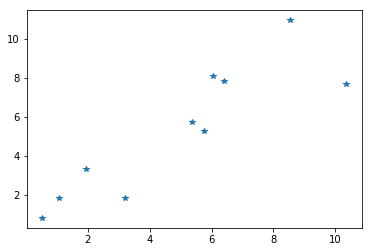

In [33]:
plt.plot(x_data,y_label,'*')

In [34]:
np.random.rand(2)

array([0.21168679, 0.55434578])

In [35]:
m = tf.Variable(0.21)
b = tf.Variable(0.55)

### Cost Function

In [36]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b  #Our predicted value
    
    error += tf.sqrt((y-y_hat)**2) # The cost we want to minimize (we'll need to use an optimization function for the minimization!)


### Optimizer

In [37]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(error)

In [38]:
init = tf.global_variables_initializer()

### Create Session and Run!

In [39]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
        
        result = sess.run(train)        
        slope , intercept = sess.run([m,b])
        print(slope, intercept)
    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])

0.7019821 0.65
0.9124379 0.69
1.0078455 0.71
0.9958813 0.71
0.9839171 0.71
0.9719529 0.71
0.9599887 0.71
0.9480245 0.71
0.9360603 0.71
0.9240961 0.71
1.0195037 0.72999996
1.0075395 0.72999996
0.9955753 0.72999996
0.9836111 0.72999996
0.9716469 0.72999996
0.9596827 0.72999996
0.9477185 0.72999996
0.9357543 0.72999996
0.9237901 0.72999996
1.0191977 0.74999994
1.0072335 0.74999994
0.9952693 0.74999994
0.9833051 0.74999994
0.9713409 0.74999994
0.9593767 0.74999994
0.9474125 0.74999994
0.9354483 0.74999994
0.9234841 0.74999994
1.0188918 0.7699999
0.9854207 0.74999994
0.9734565 0.74999994
0.9614923 0.74999994
0.9495281 0.74999994
0.9375639 0.74999994
0.9255997 0.74999994
1.0210073 0.7699999
0.98753613 0.74999994
0.97557193 0.74999994
0.9636077 0.74999994
0.9516435 0.74999994
0.9396793 0.74999994
0.9277151 0.74999994
1.0231228 0.7699999
0.9896517 0.74999994
0.9776875 0.74999994
0.9657233 0.74999994
0.9537591 0.74999994
0.9417949 0.74999994
0.9298307 0.74999994
0.91786647 0.74999994
1.0132741 

In [40]:
final_slope

0.9207106

In [41]:
final_intercept

0.74999994

### Evaluate Results

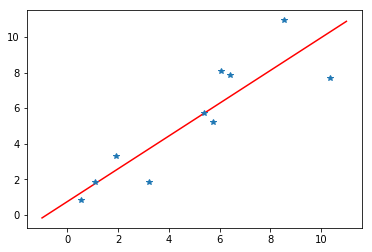

In [42]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

## 6. TensorFlow Regression and Classification

## Regression

In [43]:
x_data = np.linspace(0.0,10.0,1000000)

In [44]:
noise = np.random.randn(len(x_data))

In [45]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [46]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [47]:
my_data.head()

,X Data,Y
0,0.00000,5.882817
1,0.00001,4.419923
2,0.00002,4.498445
3,0.00003,5.590968
4,0.00004,4.268404


In [49]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

ImportError: matplotlib is required for plotting.

## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [22]:
batch_size = 8

In [24]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [25]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [26]:
y_model = m*xph + b

In [27]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [29]:
init = tf.global_variables_initializer()

In [30]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [31]:
model_m

0.4595381

In [32]:
model_b

4.9650326

### Results

In [33]:
y_hat = x_data * model_m + model_b

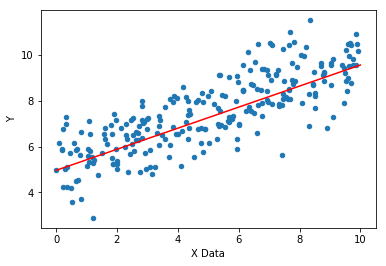

In [34]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

## 7. tf.estimator API


1. “Train-to-Serve” Design
2. Hides Session, Graph, Layers, Iterative Loops (Train, Eval, Predict) 
3. Hooks for All Phases of Model Training and Evaluation
    * Load Input: input_fn()
    * Train: model_fn() and train()
    * Evaluate: eval_fn() and evaluate()
    * Performance Metrics: Loss, Accuracy, ...
    * Save and Export: export_savedmodel()
    * Predict: predict()
    
4. In general, to use the Estimator API we do the following:
    * Define a list of feature columns
    * Create the estimator model
    * Create a Data input function
    * Call train, evaluate and predict methods on the estimator object.

In [35]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [36]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmphar3rm6u', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12370f6a0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


### Set up Estimator Inputs

In [40]:
# Can also do .pandas_input_fn
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [41]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [42]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=4,num_epochs=1000,shuffle=False)

### Train the Estimator

In [43]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmphar3rm6u/model.ckpt.
INFO:tensorflow:loss = 313.99042, step = 1
INFO:tensorflow:global_step/sec: 776.674
INFO:tensorflow:loss = 10.8471155, step = 101 (0.130 sec)
INFO:tensorflow:global_step/sec: 1287.98
INFO:tensorflow:loss = 10.168525, step = 201 (0.079 sec)
INFO:tensorflow:global_step/sec: 1123.19
INFO:tensorflow:loss = 5.475356, step = 301 (0.089 sec)
INFO:tensorflow:global_step/sec: 996.8
INFO:tensorflow:loss = 2.3144083, step = 401 (0.102 sec)
INFO:tensorflow:global_step/sec: 404.326
INFO:tensorflow:loss = 2.41624, step = 501 (0.245 sec)
INFO:tensorflow:global_step/sec: 1347.02
INFO:tensorflow:loss = 9.42324, step = 601 (0.074 sec)
INFO:tensorflow:glo

### Evaluation

In [44]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-13-23:31:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmphar3rm6u/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-13-23:31:56
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1032361, global_step = 1000, loss = 4.4129443


In [45]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-13-23:32:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmphar3rm6u/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-13-23:32:01
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0995523, global_step = 1000, loss = 4.398209


In [46]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.1032361, 'loss': 4.4129443, 'global_step': 1000}
eval metrics: {'average_loss': 1.0995523, 'loss': 4.398209, 'global_step': 1000}


### Predictions

In [47]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [48]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmphar3rm6u/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.304289], dtype=float32)},
 {'predictions': array([4.977799], dtype=float32)},
 {'predictions': array([5.651309], dtype=float32)},
 {'predictions': array([6.3248196], dtype=float32)},
 {'predictions': array([6.9983296], dtype=float32)},
 {'predictions': array([7.6718397], dtype=float32)},
 {'predictions': array([8.34535], dtype=float32)},
 {'predictions': array([9.01886], dtype=float32)},
 {'predictions': array([9.69237], dtype=float32)},
 {'predictions': array([10.365881], dtype=float32)}]

In [49]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmphar3rm6u/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [50]:
predictions

[array([4.304289], dtype=float32),
 array([4.977799], dtype=float32),
 array([5.651309], dtype=float32),
 array([6.3248196], dtype=float32),
 array([6.9983296], dtype=float32),
 array([7.6718397], dtype=float32),
 array([8.34535], dtype=float32),
 array([9.01886], dtype=float32),
 array([9.69237], dtype=float32),
 array([10.365881], dtype=float32)]

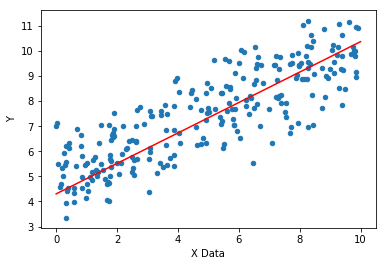

In [51]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')